# EDA on the *Palmer Archipelago (Antarctica) penguins dataset*

-------------

<center><img src = "Three penguins.png"></center>


### Meet the Penguins

The Palmer Penguins Dataset deals with three species of Penguins found in the Palmer Archipelago, Antarctica.
* Adelie penguin (*Pygoscelis adeliae*)
* Gentoo penguin (*Pygoscelis papua*)
* Chinstrap penguin (*Pygoscelis antarcticus*)

In the data, different measurements for a sample of the species of penguins were taken which include  
the length and depth of the bill as well as the body mass.  
The Data also mentions the sex of the penguins and the island in which they are found.

Palmer Archipelago (Antarctica) penguin data Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.  

The given data set **penguins_size.csv** contains the following columns:-

* **species**           :   Penguin species (Chinstrap, Adélie, or Gentoo)

* **culmen_length_mm**  :   Culmen length (mm)

* **culmen_depth_mm**   :   Culmen depth (mm)

* **flipper_length_mm** :   Flipper length (mm)

* **body_mass_g**       :   Body mass (g)

* **island**            :   Island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)

* **sex**               :   Penguin sex


I came across this dataset on kaggle  
Here's the link :- https://www.kaggle.com/code/parulpandey/penguin-dataset-the-new-iris

### **Importing the required Libraries to perform EDA**

**We will import the following libraries to perform EDA and for Visualization**

* Numpy:-  
    NumPy can be used to perform a wide variety of mathematical operations on arrays.   

* Pandas:-  
    Pandas is mainly used for data analysis and associated manipulation of tabular data in Dataframes.  

* Matplotlib:-  
    Matplotlib is a cross-platform, data visualization and graphical plotting library for Python and its numerical extension NumPy.  

* Seaborn:-    
    Seaborn is a library that uses Matplotlib underneath to plot graphs. It will be used to visualize random distributions.  


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")
# The filter warnings is just to ignore the red text boxes when running an output.

----------------

### **Data Preperation and Cleaning**

---------------------

**Loading in the Data**
    
The data will be displayed in the form of a Pandas Dataframe with the help of the **pd.read_csv()** function of the pandas library

In [3]:
penguins_df = pd.read_csv(r"penguins_size.csv")
penguins_df.head(10) # To view the top ten records of the data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


In [4]:
penguins_df.shape
# This tells us the number of rows and columns
# ie. Rows = 344 and Columns = 7

(344, 7)

In [5]:
# To get basic info about the given dataset
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


From the **info()** function we get to know that there are some missing values in the data that we have to deal with.

In [6]:
penguins_df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


The **describe()** function tells us the count,mean and range of all the numberical values in the data.

-----------

**Treating the Null values**

At this stage it will be beneficial to create a copy of the dataset so that alterations can be made to it without changing the values in the original data.

In [7]:
df1 = penguins_df.copy()
df1

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [8]:
pd.set_option("display.max_rows",10) # Sets the number of rows to be Displayed

In [9]:
# To get the sum of the null values in the dataset
penguins_df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

Seems like most of the missing values are from the sex column of the data. Lets take a look at the variable.

In [10]:
df1[df1["sex"].isna()]
df1.loc[336,"sex"]="MALE" # Since there was a value at index 336 in the "sex" column as "."

* I will drop the record 3 and 339 since most of the data is missing

In [11]:
df1.drop(index=[3,339],inplace=True)
# Inplace drops the records permanently
df1.reset_index(inplace=True,drop=True) 
# Resets the index numbers and drops the old index
df1.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [12]:
df1.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  8
dtype: int64

Now we are left with only 8 null values in the Sex column.  
Since it is a categorical variable with only 2 repeating values lets take a look at the most frequently occouring value in the column.

In [13]:
df1.sex.mode()

0    MALE
Name: sex, dtype: object

The most frequently occouring value is "Male", so we will impute the null values in the column with the same.

In [14]:
df1.sex.fillna(df1.sex.mode()[0],inplace=True)
# fillna() is used to fill the null values in the data with either the mean, median or mode

In [15]:
# Now we check to see if the values have been imputed successfully, thereby getting rid of the null values in the data
df1.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

---------------------

### **Exploratory Analysis and Visualizations**

-------------------

Now that the missing values are dealt with, we can take a look at some interesting patterns in the data with the help of visualization.

1. **Since the dataset deals with three diffrent species of penguins, namely Adelie,Gentoo,Chinstap.**   
   **Let's get the total number of pengunis for each of the given species to get a basic idea about the distribution.**

In [16]:
penguins_df["species"].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

From the **value_counts()** function performed on the "Species" we come to know that there are 
* 152 Adelie Penguins
* 124 Gentoo Penguins
* 68 Chinstrap Penguins

Lets visualize the data using a countplot

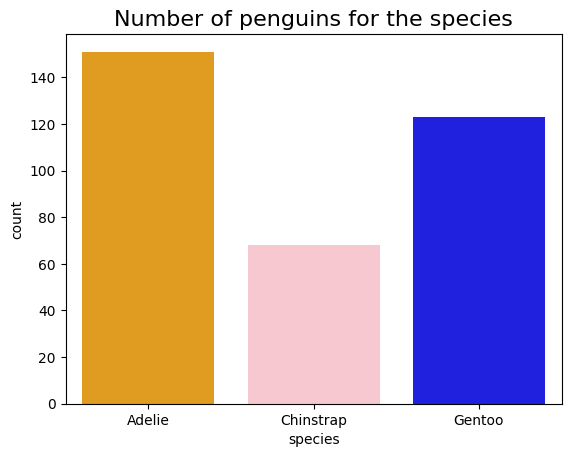

In [17]:
sns.countplot(x='species',data=df1, palette=('Orange', 'Pink', 'Blue'))
plt.title("Number of penguins for the species",fontsize=16)
plt.show()

2. **The data also mentions three islands Torgersen,Biscoe,Dream. Let's see how many penguins are there (on the basis of gender) in each island.**  

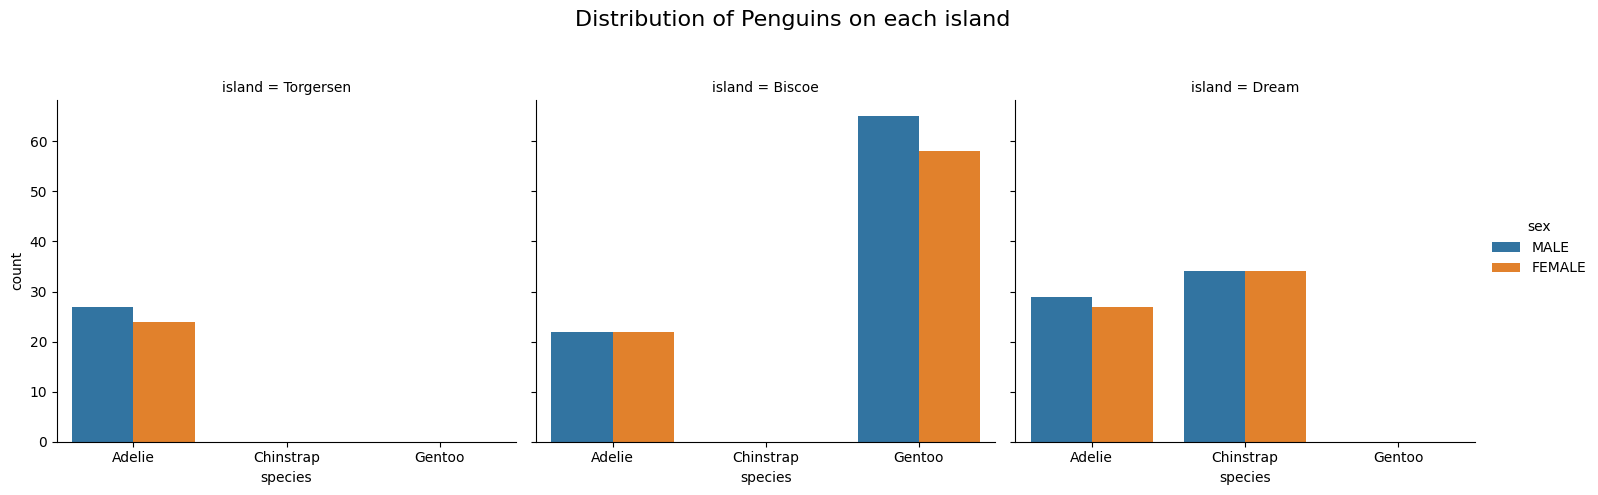

In [18]:
sns.catplot(x="species", hue="sex", col="island",data=df1, kind="count")
plt.subplots_adjust(top=0.8)
plt.suptitle('Distribution of Penguins on each island', fontsize = 16);

On the basis of the countplot we can come to the following conclusions:-
* Only Adelie penguins are found on the Torgerson island, with the male population being higher than the female.  
* On the Biscoe island only Adelie and Gentoo penguins are found, with Gentoo penguins being the majority.
* Adelie and Chinstap pengunis are found on on the Dream Island with almost an equivalent sex ratio and similar numbers.

Body parts of the penguin mentioned in the data :-
* Culmen - Culmen is the uppper ridge of a penguin's bill (beak). Its length and depth are calculated.
* Flippers - Flippers are modified wings of the penguins adapted for swimming 

<center><img src = 'penguin beak.png'></center>

* ##### **Analysis of the Body Mass of the Penguins for males and females** 

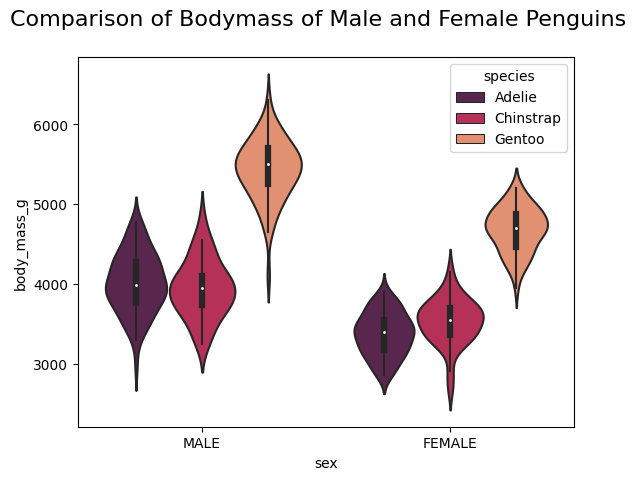

In [19]:
sns.violinplot(x="sex", y="body_mass_g", hue="species", data=df1,palette='rocket')
plt.suptitle('Comparison of Bodymass of Male and Female Penguins', fontsize = 16);

    From the violinplot it seems that the Males in all the species of penguins are comparatively heavier than the females

* **Analysis of Culmen Length of the different species of Penguins**

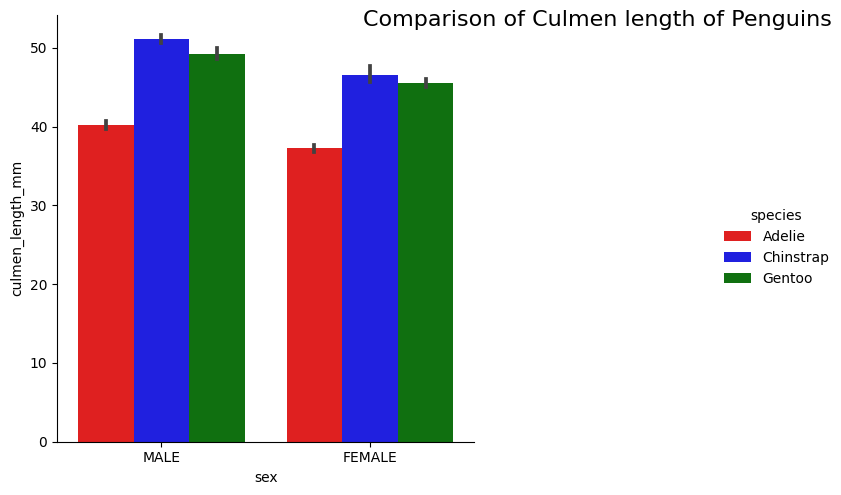

In [20]:
sns.catplot(x="sex", y="culmen_length_mm",hue="species", data=df1, kind="bar", palette=('Red', 'Blue', 'Green'))
plt.suptitle('Comparison of Culmen length of Penguins', fontsize = 16,x=1.0);

    From this plot we can see that Chinstrap penguins have the highest culmen length
    in both males and females as compared to Gentoo and Adelie.

* **Analysis of Culmen Depth of the different species of Penguins**

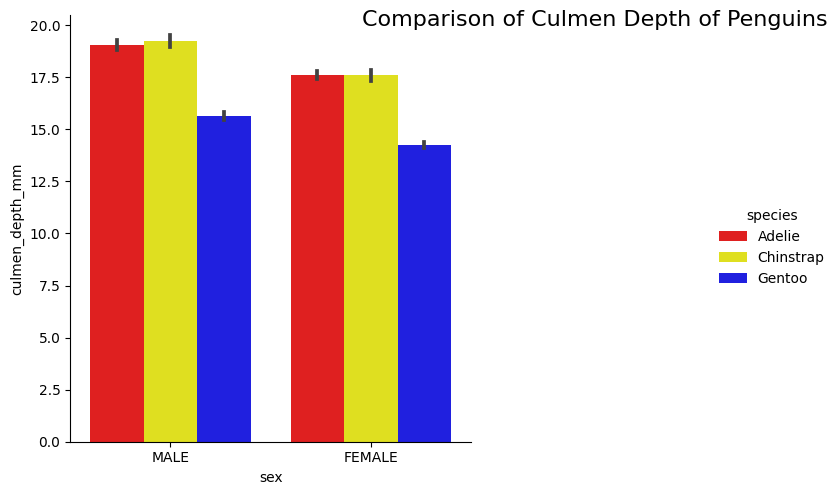

In [21]:
sns.catplot(x="sex", y="culmen_depth_mm", hue="species", data=df1, kind="bar", palette=('Red', 'Yellow', 'Blue'))
plt.suptitle('Comparison of Culmen Depth of Penguins', fontsize = 16,x=1.0);

    From this plot we can Chinstrap and Adelie penguins have almost the same culmen depth
    in both male and female while Gentoo has the lowest.

Since we see the following trends between culmen length and depth lets see if there is a relationship between culmen length and depth on the basis of species with the help of a scatterplot.

* ##### **Relationship between Culmen Length vs Culmen Depth** 

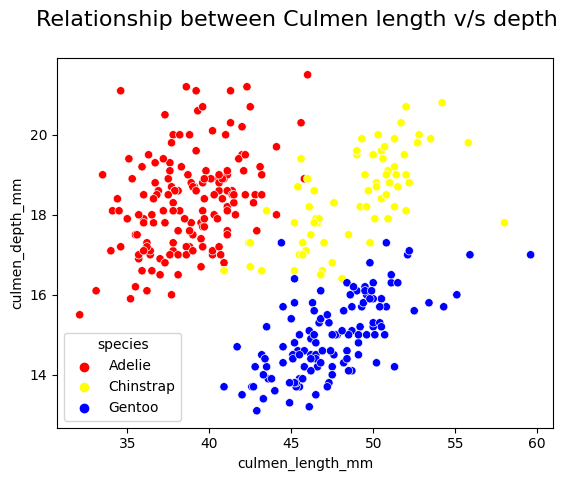

In [22]:
sns.scatterplot(x = df1.culmen_length_mm, y = df1.culmen_depth_mm, hue = df1.species, palette=('Red', 'Yellow', 'Blue'))
plt.suptitle('Relationship between Culmen length v/s depth', fontsize = 16);

From the above Scatterplot we can make the following conclusion :- 

    The three groups of species Adelie, Chinstrap and Gentoo have a moderate relation,
    between them on the basis of Culmen Length and Depth with a few overlapping values.

* ##### **Pairplot of the Dataset** 

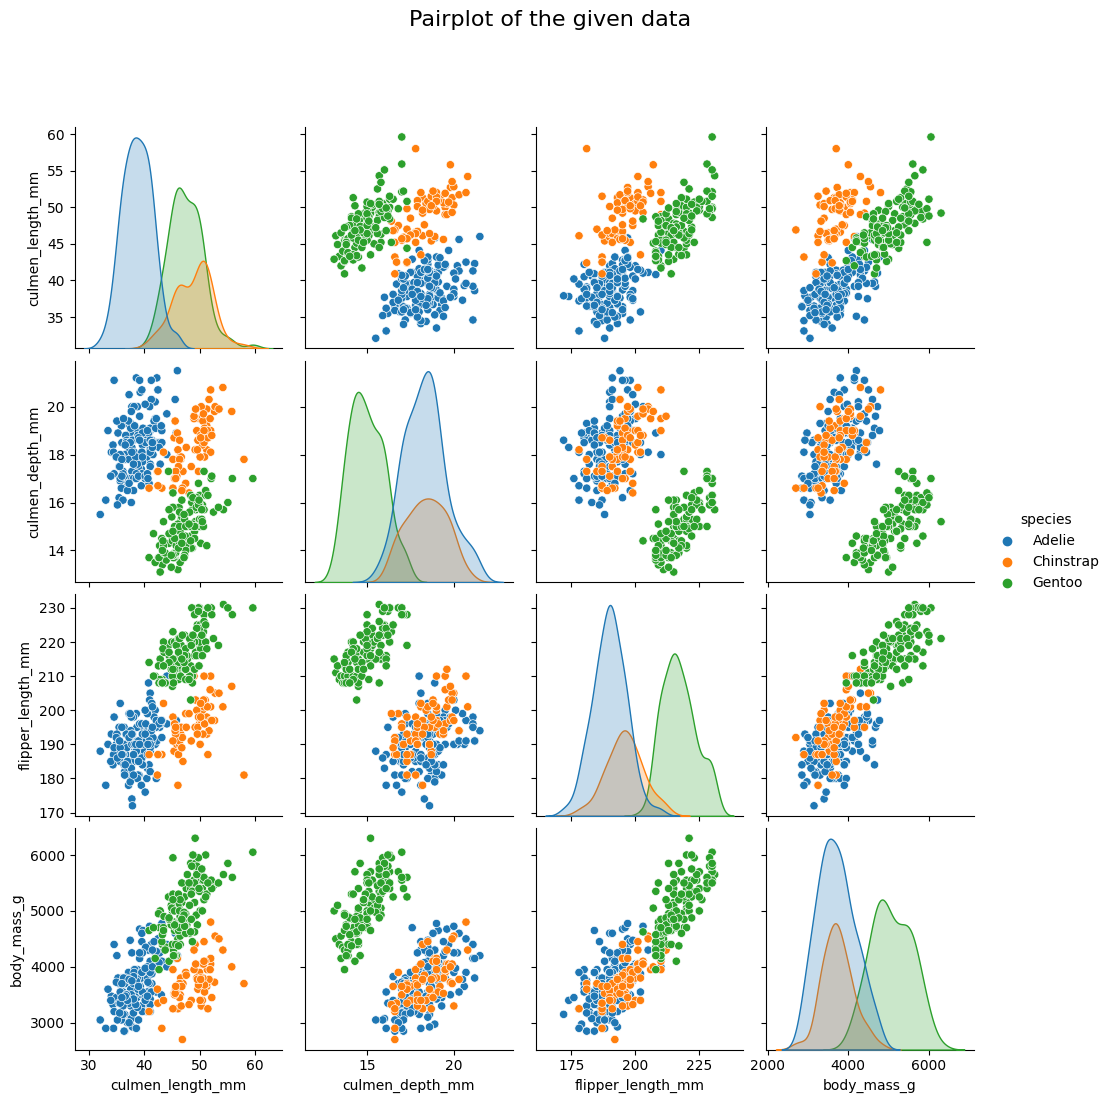

In [23]:
sns.pairplot(df1,hue='species')
plt.suptitle('Pairplot of the given data', fontsize = 16,y=1.1);

From above plot we can see that :-

    1. On the basis of culmen length, Adelie penguins is easily seperable/distinguishable.  
    2. On the basis ofculmen depth, flipper length and body mass, Gentoo is easily seperable/distinguishable

----------------------

### **Asking and Answering Questions about the Dataset**

---------------------

**Q1. On the basis of the given data what are the patterns seen in the distribution of penguins across the three islands?**

In the barplot of the distribution of penguins we saw that Adelie penguins live in all the three islands,  
whereas Gentoo penguins live on Biscoe island and Chinstrap penguins live on Torgersen island.

**Q2. Of all the three species, which one of them weighs the heaviest? What are the patterns seen in the Species?**

On the basis of the Violin plot, we can say that generally male pengunis are heavier than the females.  
With regards to individual species Gentoo penguins weigh the heaviest

**Q3. What is the relationship seen between flipper length and body mass of the penguins?**

Text(0, 0.5, 'body mass')

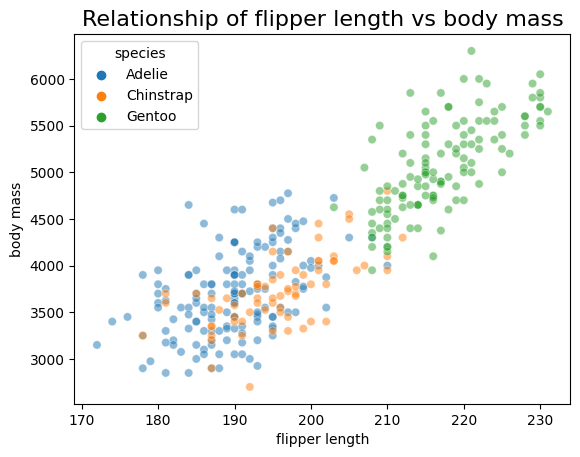

In [24]:
sns.scatterplot(data = df1 , x = 'flipper_length_mm' , y = 'body_mass_g' , hue = 'species' , alpha = 0.5 )
plt.title("Relationship of flipper length vs body mass",fontsize=16)
plt.xlabel("flipper length")
plt.ylabel("body mass")

As the graph displays, it seems that flipper length and body mass has positive correlation, which means that if the flipper length increases the body mass also increases.   
In this graph, use diffenrent colors to display different species.

**Q4. Which species of the pengunis is the smallest as compared to the other three ?**

Here we take flipper length and culmen length as the parameters for determining the smallest species of penguins.

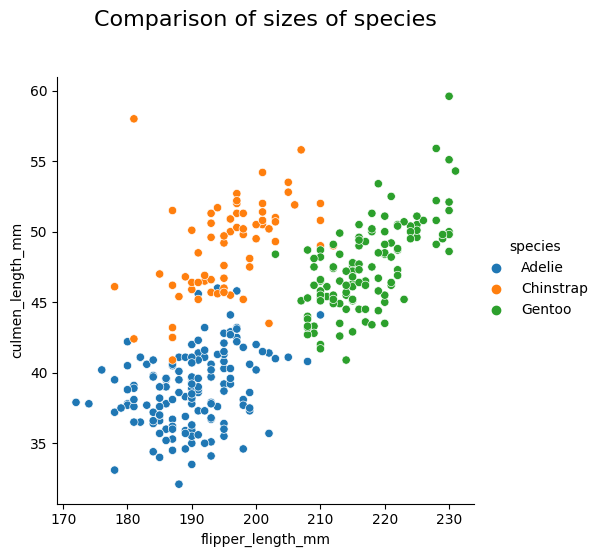

In [25]:
sns.relplot(data=df1,x="flipper_length_mm",y="culmen_length_mm", hue="species")
plt.title('Comparison of sizes of species', fontsize = 16,y=1.1);

From this plot we see that **Adelie** is small in size as compared to the other species.

----------

### **Inferences and conclusion**

---------------------

* On the basis of Distribution :-  
    **Adelie** lives in all three islands whereas **Gentoo** lives in Biscoe and **Chinstrap** lives in Torgersen.  
    Most of the Penguins belong to Biscoe island and least are from Torgersen.

* Flipper length and body mass of the penguins are strongly co-related.   
  It is seen from the EDA that penguins with longer flippers generally weigh more.  

* On the basis of weight (body mass) of the species :-  
    **Gentoo** penguins weigh the heaviest.   
    Male penguins are generally heavier as compared to female penguins.  

* Culmen length and Culmen depth of the species show a moderate co-relation with a few overlapping values.

* On the basis of size, Adelie is the smallest penguin.   
    Adelie, also has the highest population of the three species in the sample.

----------

### **References :-** 

---------------------

Dataset :-               https://www.kaggle.com/parulpandey/palmer-archipelago-antarctica-penguin-data/code

Data Package Metadata :- https://portal.edirepository.org/nis/metadataviewer?packageid=knb-lter-pal.219.5

Research Paper :-        https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0090081

-------------

### **Future Work :-** 

---------------------

* As the next step statistical test can be run on the data to get some accurate results to the questions in the EDA which are backed by scientific facts (biological research).

*  Machine learning models could be built for predicting the count of the species in the future and also the survival rate can be calculated.  
(more data needed)

* These steps could aid in further research helping in preservation of the species and also reducing their endangerment to the changing climatic conditions.